<a href="https://colab.research.google.com/github/arsxlanali/aws_machine_learning/blob/master/TweetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Data Importing

Importing all libraries we will be using in this project

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np
import string
import re

Load zipped dataset from Google Drive (First mount drive & then unmount it)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/trainingandtestdata.zip" -d "/content"
drive.flush_and_unmount()

Mounted at /content/drive
Archive:  /content/drive/MyDrive/trainingandtestdata.zip
replace /content/testdata.manual.2009.06.14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Importing the training & test dataset with index column as ids and names of columns as given in the task

In [3]:
trainingSet = pd.read_csv("./training.1600000.processed.noemoticon.csv",
                          encoding='latin-1',
                          names=["target", "ids", "date", "flag","user","text"]
                          ).set_index('ids')

In [4]:
testSet = pd.read_csv("./testdata.manual.2009.06.14.csv",
                      encoding='latin-1',
                      names=["target", "ids", "date", "flag","user","text"]
                      ).set_index('ids')

The 

In [5]:
dataframe = trainingSet.append(testSet)
len(dataframe)

1600498

In [6]:
# sorting by first name
dataframe.sort_values("ids", inplace=True)
  
# dropping duplicate values
dataframe.drop_duplicates(keep=False, inplace=True)

In [7]:
len(dataframe)

1600130

In [8]:
datalen = int(len(dataframe)/10)
dataframe = dataframe[0:10000]
dataframe.head()

,target,date,flag,user,text
ids,,,,,
3,4,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
5,4,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
6,4,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
7,4,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


# 1. Explore & Prepare Data

In [9]:
# Define the regular expression pattern
pattern = r"(#\w+)|(@\w+)|(https?://\S+)"

translator = str.maketrans('', '', string.punctuation)
# Apply the regular expression to the 'tweet' column
dataframe['text'] = dataframe['text'].apply(lambda x: 
                                                re.sub(pattern, "", x)
                                                .translate(translator))

<ipython-input-9-63bdf212b990>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['text'] = dataframe['text'].apply(lambda x:


In [10]:
dataframe

,target,date,flag,user,text
ids,,,,,
3,4,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,I loooooooovvvvvveee my Kindle2 Not that the ...
4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2 Love it Lee childs is good...
5,4,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,Ok first assesment of the it fucking rocks
6,4,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,Youll love your Kindle2 Ive had mine for a fe...
7,4,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,Fair enough But i have the Kindle2 and I thi...
...,...,...,...,...,...
1468693970,0,Tue Apr 07 03:12:29 PDT 2009,NO_QUERY,earcos,That page doesnt exist
1468693972,0,Tue Apr 07 03:12:29 PDT 2009,NO_QUERY,subaie,I could not install it for XP users here in A...
1468694428,0,Tue Apr 07 03:12:37 PDT 2009,NO_QUERY,Jayme1988,I am on a healthy eating kick I could only ha...


# 2. Build A BOW and Train Model

In [50]:
# Create a Vectorizer Object
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(dataframe['text'])

# Encode the Document
vector = vectorizer.transform(dataframe['text'])
X = vector.toarray()
Y = dataframe['target']
print(len(X))

10000


In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

## KNN Model Training

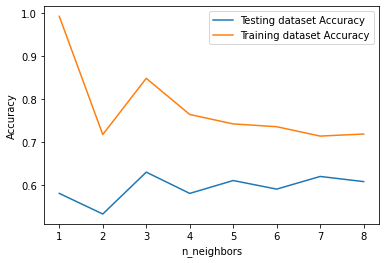

In [14]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Pick the Best Number of Neighbours in KNN

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)

y_ped_KNN = knn.predict(x_test)

## Training Decesion Tree (DT)

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_DT = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?

## Training Support Vector Machine (SVM)

In [17]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_SVM = clf.predict(x_test)

# Model Evalutions

## Accuracy

In [18]:
print("Accuracy(KNN):",metrics.accuracy_score(y_test, y_ped_KNN))
print("Accuracy(DT):",metrics.accuracy_score(y_test, y_pred_DT))
print("Accuracy(SVM):",metrics.accuracy_score(y_test, y_pred_SVM))

Accuracy(KNN): 0.6195
Accuracy(DT): 0.6835
Accuracy(SVM): 0.7315


## Confusion Matrix

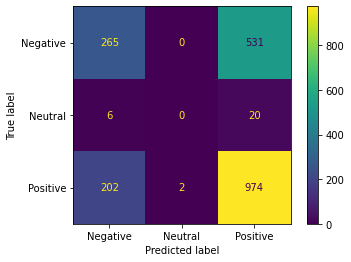

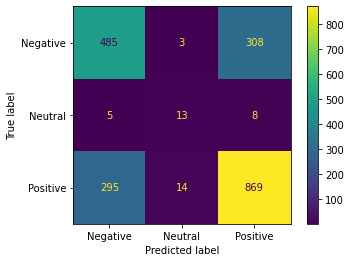

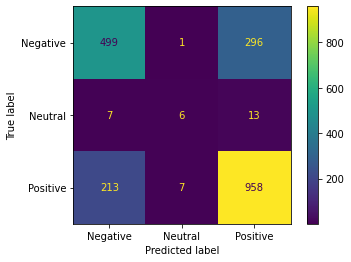

In [19]:
labels = ["Negative", "Neutral", "Positive"]
confusion_matrix = metrics.confusion_matrix(y_test, y_ped_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
cm_display.plot()
plt.show()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_DT)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =labels)
cm_display.plot()
plt.show()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_SVM)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =labels)
cm_display.plot()
plt.show()

## Classification Report

In [20]:
print("KNN")
print(classification_report(y_test, y_ped_KNN, target_names=labels))
print("DT")
print(classification_report(y_test, y_pred_DT, target_names=labels))
print("SVM")
print(classification_report(y_test, y_pred_SVM, target_names=labels))

KNN
              precision    recall  f1-score   support

    Negative       0.56      0.33      0.42       796
     Neutral       0.00      0.00      0.00        26
    Positive       0.64      0.83      0.72      1178

    accuracy                           0.62      2000
   macro avg       0.40      0.39      0.38      2000
weighted avg       0.60      0.62      0.59      2000

DT
              precision    recall  f1-score   support

    Negative       0.62      0.61      0.61       796
     Neutral       0.43      0.50      0.46        26
    Positive       0.73      0.74      0.74      1178

    accuracy                           0.68      2000
   macro avg       0.59      0.62      0.60      2000
weighted avg       0.68      0.68      0.68      2000

SVM
              precision    recall  f1-score   support

    Negative       0.69      0.63      0.66       796
     Neutral       0.43      0.23      0.30        26
    Positive       0.76      0.81      0.78      1178

    accur

# 4. Build CNN Using Word Embedding

In [49]:
# Define the input text data and labels
dataframe1 = dataframe[0:2000]
dataframe1['target'].replace(to_replace= 2, value = 1, inplace=True )
dataframe1['target'].replace(to_replace= 4, value = 2, inplace=True )
text_data = list(dataframe1['text'])
labels = list(dataframe1['target'])
labels = np.array(labels)

#Tokenize the text data and create the feature vectors
#we will use a simple bag-of-words representation
vocab = set([word for text in text_data for word in text.split()])
feature_vectors = []
for text in text_data:
    feature_vector = [1 if word in text.split() else 0 for word in vocab]
    feature_vectors.append(feature_vector)

# Pad the sequences to the same length
max_length = max([len(doc) for doc in feature_vectors])
padded_sequences = pad_sequences(feature_vectors, maxlen=max_length, padding='post', truncating='post')
# Split the data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

#print(type(y_train))

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(vocab), output_dim=300, input_length=max_length))
model.add(Conv1D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

[1 1 1 ... 1 1 1]
Epoch 1/2
50/50 [==============================] - 146s 3s/step - loss: 0.7622 - accuracy: 0.5669 - val_loss: 0.6436 - val_accuracy: 0.6250
Epoch 2/2
50/50 [==============================] - 145s 3s/step - loss: 0.5131 - accuracy: 0.7619 - val_loss: 0.6216 - val_accuracy: 0.6650
Accuracy: 66.50%
